 # 1) Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline
from collections import Counter
import random
import math
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
from sklearn import linear_model
from sklearn.model_selection import KFold as kf
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import preprocessing, cross_validation


df = pd.read_csv('/Users/prathmesh/Desktop/Frogs_MFCCs.csv')
print(df.isnull().values.any())


/Users/prathmesh/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


False


/Users/prathmesh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Counter({0: 2915, 2: 1950, 3: 1773, 1: 557})
Current size: [15.0, 10.0]


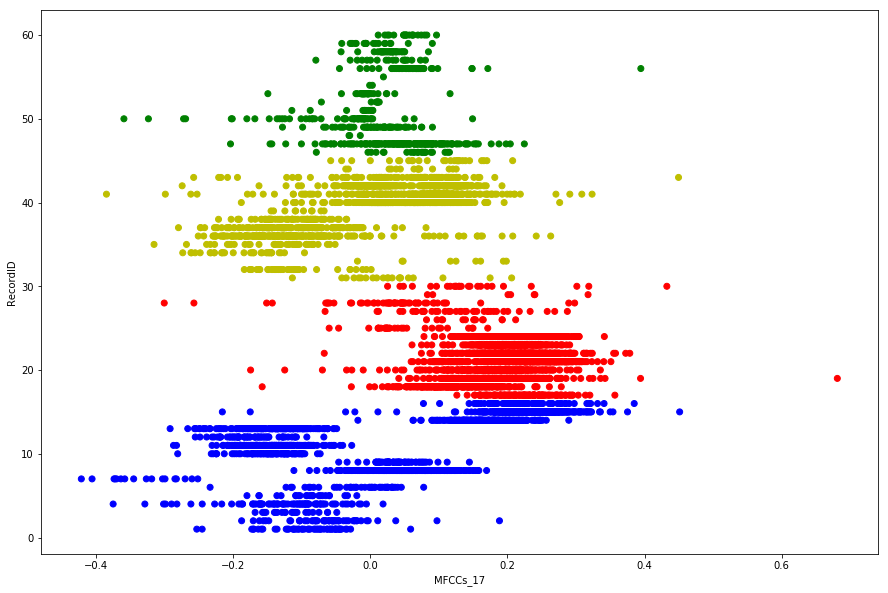

In [5]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

estimator = KMeans(n_clusters=4)
X = df[["MFCCs_17","RecordID"]]
estimator.fit(X)
labels = estimator.labels_
print (Counter(labels))
colors = set_colors(labels)
plt.scatter(X['MFCCs_17'], X['RecordID'], c=colors)
plt.xlabel("MFCCs_17")
plt.ylabel("RecordID")


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.show()

The above graph is the kmeans graph depicting the clustering using MFCCs_17 and the record ID
we can understand that, the particular voice sample of MFCCs 17 is clustered with the record ID 
depicting the family and genus of the frogs

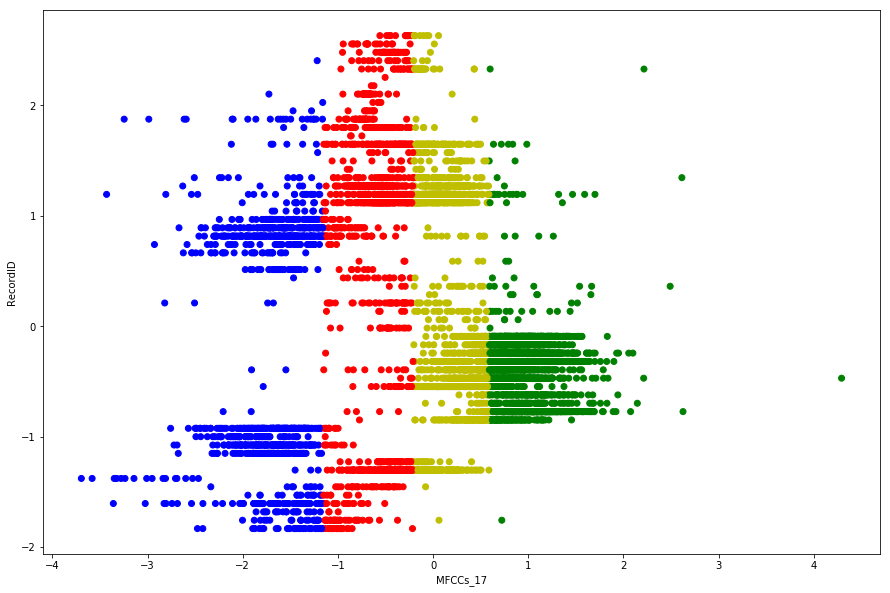

In [4]:
from sklearn.preprocessing import StandardScaler
estimator = KMeans(n_clusters=4)
X=df[['MFCCs_17']]
Y=df[['RecordID']]
sc_X = StandardScaler()
t_X=sc_X.fit_transform(X)
t_Y=sc_X.fit_transform(Y)
estimator.fit(t_X, t_Y)
labels = estimator.labels_
colors = set_colors(labels)

plt.scatter(t_X,t_Y, c=colors)
plt.xlabel('MFCCs_17')
plt.ylabel('RecordID')
plt.show()

#### Scaling affects clustering. The clusters are formed parallel to y axis and are scaled down to a uniform level

Counter({0: 3880, 3: 1664, 2: 1051, 1: 600})


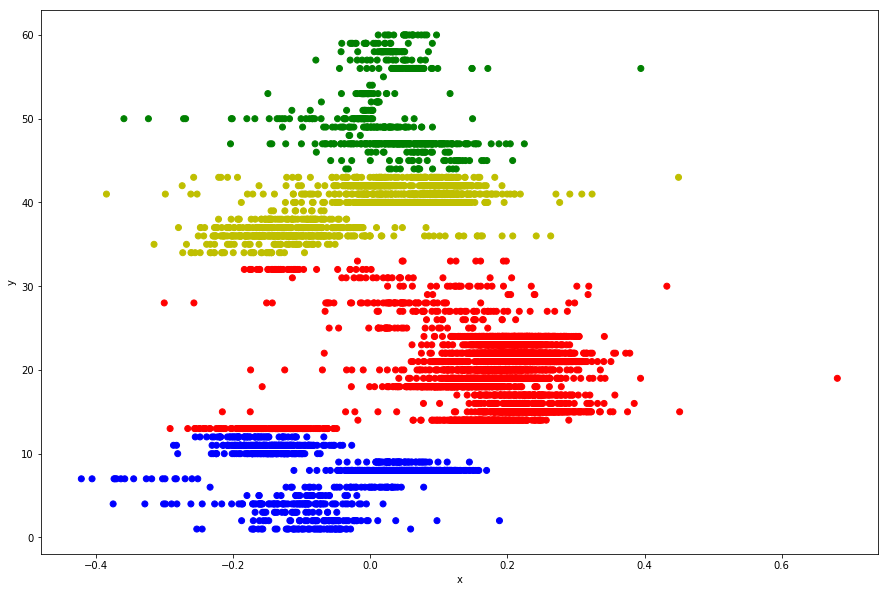

In [4]:
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["MFCCs_17","RecordID"]]
estimator.fit(X)
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df['MFCCs_17'], df['RecordID'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Yes. The clustering methods generate the same clusters(almost).But there is a munimum difference

#### The cluster product interesting groups because with the clusters we can identify that which family of frogs have what values of MFCCs_17 and any other voice sampling value if needed

In [5]:
df.corr()

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  \
MFCCs_ 1  1.000000 -0.264768 -0.308624  0.021448  0.188768 -0.218619   
MFCCs_ 2 -0.264768  1.000000  0.611001 -0.042378 -0.420759  0.047503   
MFCCs_ 3 -0.308624  0.611001  1.000000  0.029403 -0.756089  0.180192   
MFCCs_ 4  0.021448 -0.042378  0.029403  1.000000  0.173574 -0.611927   
MFCCs_ 5  0.188768 -0.420759 -0.756089  0.173574  1.000000 -0.116983   
MFCCs_ 6 -0.218619  0.047503  0.180192 -0.611927 -0.116983  1.000000   
MFCCs_ 7 -0.071200  0.227932  0.435171 -0.399321 -0.698757  0.322164   
MFCCs_ 8  0.037503  0.232423  0.035504  0.320716 -0.068843 -0.603540   
MFCCs_ 9 -0.000191 -0.040515 -0.187901  0.445693  0.376587 -0.288668   
MFCCs_10  0.049657 -0.226083 -0.188196 -0.103668  0.150765  0.184581   
MFCCs_11 -0.022288  0.059260  0.209527 -0.450670 -0.239089  0.308249   
MFCCs_12 -0.050154  0.133330  0.247255  0.308691 -0.071414 -0.146011   
MFCCs_13  0.072449 -0.165818 -0.183667  0.515422  0.169710 -0.363535   
MFCCs_14  0.014050 -0.006654 -0.090214 -0.366775 -0.111034  0.161294   
MFCCs_15 -0.097434  0.270655  0.209107 -0.539008 -0.193764  0.401258   
MFCCs_16  0.010451 -0.055596 -0.024501  0.250611  0.195593 -0.065702   
MFCCs_17  0.115724 -0.269448 -0.191590  0.552940  0.180462 -0.444974   
MFCCs_18 -0.002011  0.050020  0.065077  0.107670 -0.136097 -0.225529   
MFCCs_19 -0.144825  0.197618  0.229409 -0.383491 -0.154481  0.354775   
MFCCs_20 -0.085469  0.129981  0.338848 -0.413988 -0.291600  0.456391   
MFCCs_21  0.072363 -0.036238 -0.055124  0.233089 -0.015469 -0.174788   
MFCCs_22  0.079368 -0.201407 -0.405719  0.463047  0.365276 -0.443431   
RecordID -0.135785  0.060317  0.490604 -0.274889 -0.344341  0.394360   

          MFCCs_ 7  MFCCs_ 8  MFCCs_ 9  MFCCs_10    ...     MFCCs_14  \
MFCCs_ 1 -0.071200  0.037503 -0.000191  0.049657    ...     0.014050   
MFCCs_ 2  0.227932  0.232423 -0.040515 -0.226083    ...    -0.006654   
MFCCs_ 3  0.435171  0.035504 -0.187901 -0.188196    ...    -0.090214   
MFCCs_ 4 -0.399321  0.320716  0.445693 -0.103668    ...    -0.366775   
MFCCs_ 5 -0.698757 -0.068843  0.376587  0.150765    ...    -0.111034   
MFCCs_ 6  0.322164 -0.603540 -0.288668  0.184581    ...     0.161294   
MFCCs_ 7  1.000000 -0.116446 -0.812516  0.093195    ...     0.487558   
MFCCs_ 8 -0.116446  1.000000  0.342841 -0.666405    ...    -0.261781   
MFCCs_ 9 -0.812516  0.342841  1.000000 -0.223024    ...    -0.551479   
MFCCs_10  0.093195 -0.666405 -0.223024  1.000000    ...     0.516843   
MFCCs_11  0.615040 -0.335232 -0.852813  0.259270    ...     0.419063   
MFCCs_12 -0.328114  0.420723  0.453657 -0.750621    ...    -0.843506   
MFCCs_13 -0.467855  0.226465  0.670163 -0.094546    ...    -0.315413   
MFCCs_14  0.487558 -0.261781 -0.551479  0.516843    ...     1.000000   
MFCCs_15  0.423671 -0.145883 -0.540109 -0.008003    ...     0.352756   
MFCCs_16 -0.455578  0.108638  0.497591 -0.270764    ...    -0.783752   
MFCCs_17 -0.401475  0.171899  0.486216  0.011631    ...    -0.396796   
MFCCs_18  0.110193  0.126920 -0.099750  0.036676    ...     0.279587   
MFCCs_19  0.233688 -0.238918 -0.267932  0.071435    ...     0.379663   
MFCCs_20  0.417053 -0.285313 -0.434309  0.021804    ...     0.236428   
MFCCs_21 -0.026791  0.189337  0.040679 -0.163389    ...    -0.297088   
MFCCs_22 -0.499355  0.246922  0.520056 -0.005355    ...    -0.334504   
RecordID  0.157511 -0.194459 -0.048597 -0.122777    ...    -0.140010   

          MFCCs_15  MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
MFCCs_ 1 -0.097434  0.010451  0.115724 -0.002011 -0.144825 -0.085469   
MFCCs_ 2  0.270655 -0.055596 -0.269448  0.050020  0.197618  0.129981   
MFCCs_ 3  0.209107 -0.024501 -0.191590  0.065077  0.229409  0.338848   
MFCCs_ 4 -0.539008  0.250611  0.552940  0.107670 -0.383491 -0.413988   
MFCCs_ 5 -0.193764  0.195593  0.180462 -0.136097 -0.154481 -0.291600   
MFCCs_ 6  0.401258 -0.065702 -0.444974 -0.225529  0.354775  0.456391   
MFCCs_ 7  0.423671 -0.455578 -0.401475  0.110193

#### yes the relationship significant because of the values in the corr matrix

#### the below mentioned plots show the linear significant relation
between alternate voice samples

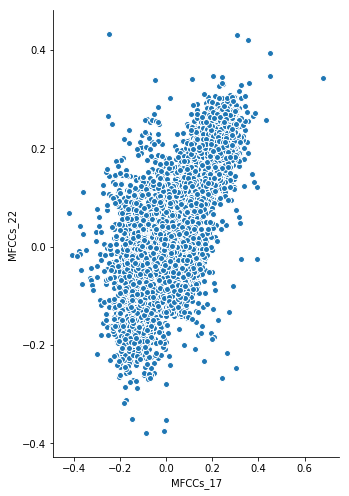

In [6]:
import seaborn as sns
sns.pairplot(df,x_vars=['MFCCs_17'], y_vars='MFCCs_22', size=7, aspect=0.7)
plt.show()

Variance inflation factor. In statistics, the variance inflation factor (VIF) is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis

The VIF factor shows that there is no multi colinearity in the selected columns from the correlation
matrix 
and also proves that in the multiple regression model the predictor variables
are independent of all the oterh predictor variables.
the allowed threshold for the VIF factor to prove non multi colinearity is less than 3


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Split dependent and Independent variables
y=df[['MFCCs_22']]
X=df[['MFCCs_ 3','MFCCs_ 2','MFCCs_19','MFCCs_ 7','MFCCs_17']]
X["Const"] = 1
VIF = pd.DataFrame()
VIF["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
VIF["features"] = X.columns

print(VIF)

   VIF Factor  features
0    1.954391  MFCCs_ 3
1    1.696988  MFCCs_ 2
2    1.620534  MFCCs_19
3    1.454042  MFCCs_ 7
4    1.875930  MFCCs_17
5    4.700546     Const


/Users/prathmesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Compare Reg coeff, p-values and Change in R2 when insignificant predictor is removed.
    The p-values and the coeff can be compared as the measure of each predictor is same. Otherwise would have to scale the predictor values and then compare coeff.
 considering the coeff values from the summary we can remove the 
 independent variables which have the least coef values making them insignificant

In [8]:
mj=df[['MFCCs_ 3','MFCCs_ 2','MFCCs_19','MFCCs_17','MFCCs_13','MFCCs_16','MFCCs_15']]


y = df['MFCCs_22']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(mj, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

(5036, 7) (5036,)
(2159, 7) (2159,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MFCCs_22   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     2933.
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        23:18:33   Log-Likelihood:                 6422.7
No. Observations:                5036   AIC:                        -1.283e+04
Df Residuals:                    5029   BIC:                        -1.279e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MFCCs_ 3      -0.1602      0.005    -34.428      0.000      -0.169      -0.151
MFCCs_ 2       0.1807      0.005     34.843      0.000       0.171       0.191
MFCCs_19      -0.3539      0.015    -22.905      0.000      -0.384      -0.324
MFCCs_17       0.2845      0.018     15.766      0.000       0.249       0.320
MFCCs_13       0.0561      0.012      4.845      0.000       0.033       0.079
MFCCs_16       0.0906      0.010      9.386      0.000       0.072       0.110
MFCCs_15      -0.1736      0.017     -9.948      0.000      -0.208      -0.139
==============================================================================
Omnibus:                      572.472   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4355.632
Skew:                          -0.262   Prob(JB):                         0.00
Kurtosis:                       7.526   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LINEAR REGRESSION

[ 0.0270075   0.18589885 -0.10553288 -0.01339809  0.07947456]
0.0658363376603
0.71502158637


/Users/prathmesh/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


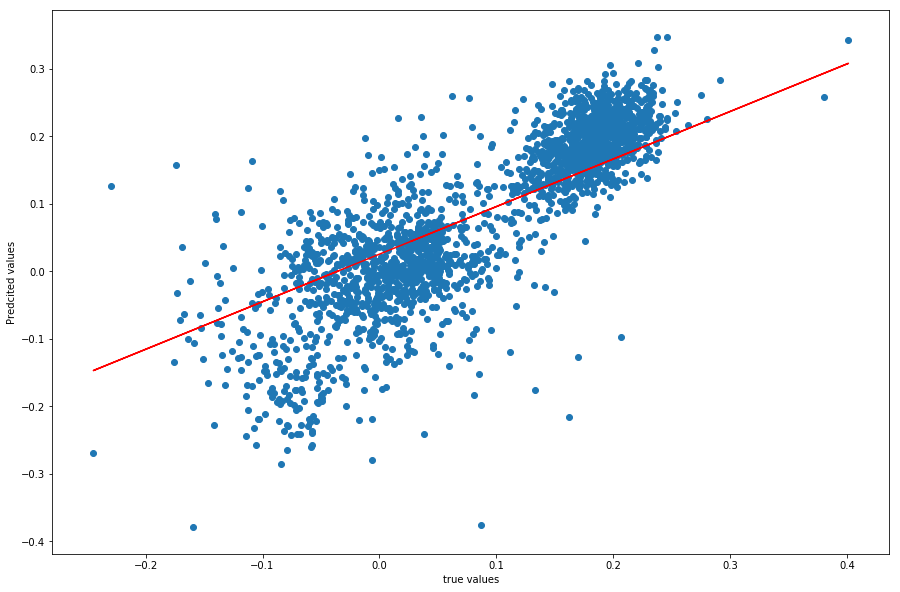

In [9]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print(predictions[0:5])

fig, ax = plt.subplots()
fit = np.polyfit(y_test, predictions,deg=1)
ax.plot(predictions, fit[0] * predictions + fit[1], color='red')
ax.scatter(predictions, y_test)
plt.xlabel("true values")
plt.ylabel("Predcited values")

ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print(rmse)

fig.show()

print(lm.score(X_test,y_test))

RESIDUAL PLOT

Text(0.5,0,'predicted values')

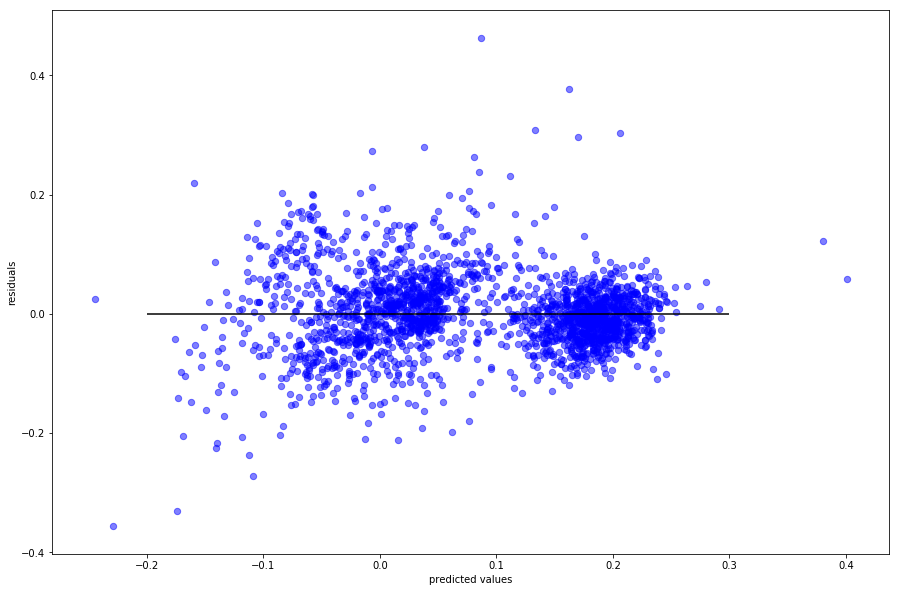

In [10]:
plt.scatter(predictions, predictions-y_test, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=-0.2, xmax=0.3)
plt.ylabel('residuals')
plt.xlabel('predicted values')

PROBABILITY NORM PLOT

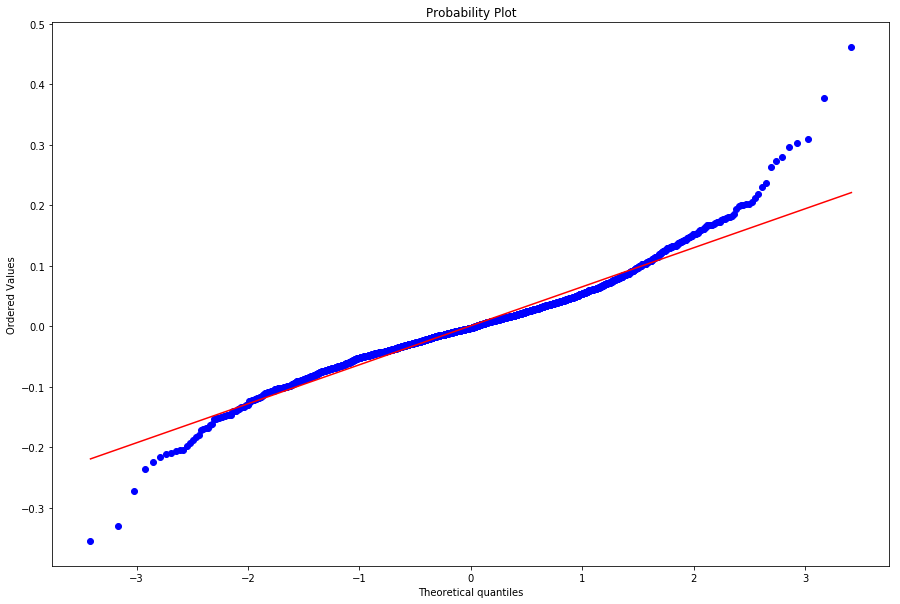

In [11]:
import scipy.stats as st
st.probplot(predictions-y_test, dist='norm',plot=plt)
plt.show()

MOdel assumptions:
1) linearity: the model is linear in nature as you can see from the above graph
    that the values are symmetrical to the line of regression hence sulfilling the 
    assumption
2) violation of independence is also satisified in this case as the graph
Independence can also be violated in non-time-series models if errors tend to always have the same sign under particular conditions, which is not evident from the residual plot

3) homoscedasticity is also satisfied from the above graph as the values are 
in proportion with the function of the predicted values, very few values are out of range

4) violations of normality is also satisfied since the values in the above graph are very close to the fit line

CORSS VALIDATION USING K_FOLD VALIDATION

The k fold cross validation reduced did not do well because it reduced the accuracy of the regression also it does not satisfy all 
the assumptions of linear regression

TRAIN: [3598 3599 3600 ..., 7192 7193 7194] TEST: [   0    1    2 ..., 3595 3596 3597]
TRAIN: [   0    1    2 ..., 3595 3596 3597] TEST: [3598 3599 3600 ..., 7192 7193 7194]
[ 0.18097012  0.166452    0.14952454  0.17575732  0.14636449]
0.442936321564


/Users/prathmesh/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


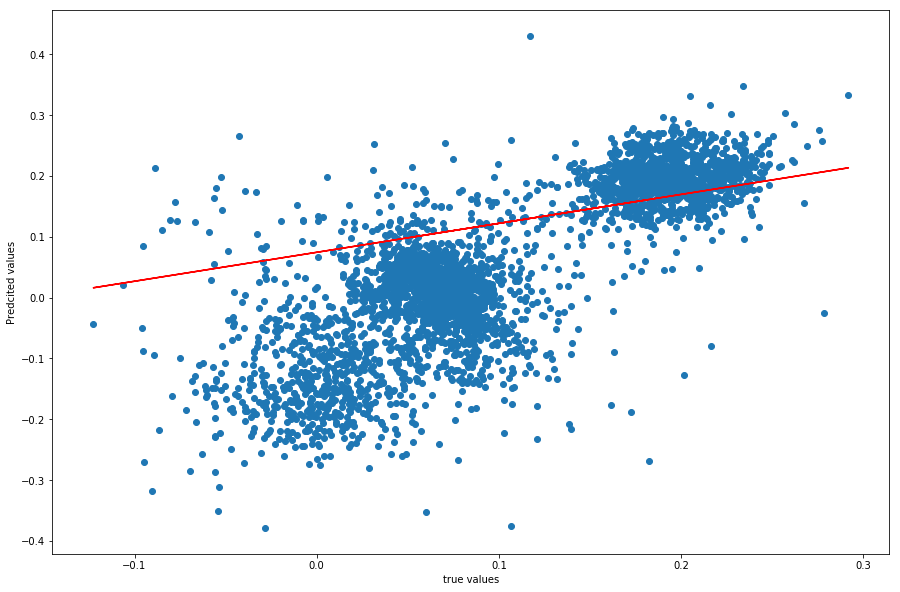

In [12]:
mj = df[['MFCCs_ 7','MFCCs_17','MFCCs_19','MFCCs_11','MFCCs_ 9']]

y = df['MFCCs_22']

kfk = kf(n_splits=2)
kfk.get_n_splits(mj)

for train_index, test_index in kfk.split(mj):
    print("TRAIN:",train_index,"TEST:",test_index)
    X_train, X_test = mj.iloc[train_index], mj.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
     
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print(predictions[0:5])

fig, ax = plt.subplots()
fit = np.polyfit(y_test, predictions,deg=1)
ax.plot(predictions, fit[0] * predictions + fit[1], color='red')
ax.scatter(predictions, y_test)
plt.xlabel("true values")
plt.ylabel("Predcited values")



fig.show()

print(model.score(X_test,y_test))

REGULARIZATION

Regularization reduces the coeffs of the sample data.. so it does not help to validate the data which is out of sample since that data is not under consideration for regression and it does not make sense in reducing their coeffs

also the rmse values does not change for the in sample data

In [13]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0,0.5,'Predicted values')

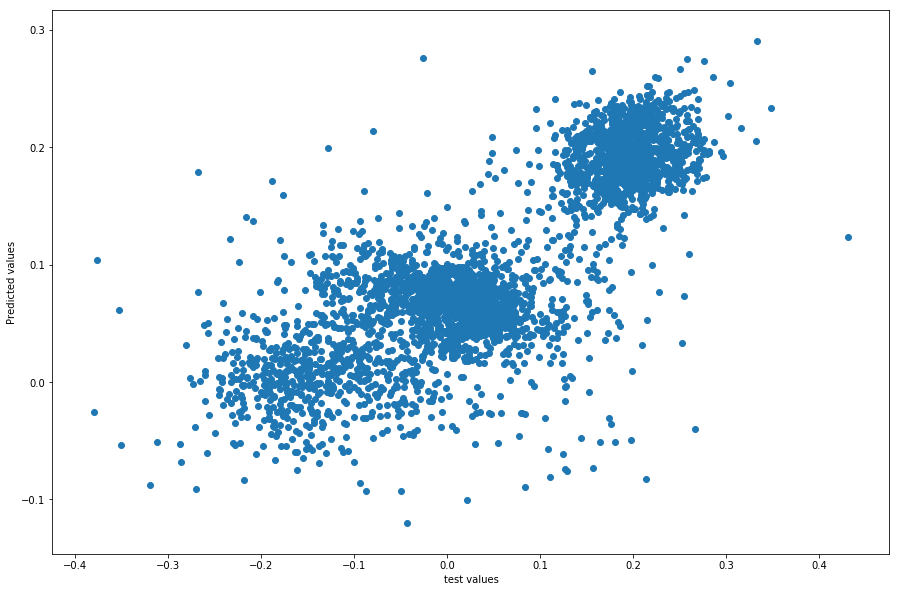

In [14]:
y_pred = ridge.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("test values")
plt.ylabel("Predicted values")


In [15]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.097430277734295523

LOGISTIC REGRESSION

to make the data categorical:

In [16]:
df['checkLeptodactylidae'] = np.where(df['Family']=='Leptodactylidae', 1,0)

In [17]:
df['checkLeptodactylidae'].value_counts()
del df['MFCCs_ 1']

In [18]:
df.groupby('checkLeptodactylidae').mean()

MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  \
checkLeptodactylidae                                                     
0                     0.360203  0.391043  0.335625  0.106394  0.168827   
1                     0.300593  0.261112  0.515292  0.140012  0.053434   

                      MFCCs_ 7  MFCCs_ 8  MFCCs_ 9  MFCCs_10  MFCCs_11  \
checkLeptodactylidae                                                     
0                     0.053305 -0.033587  0.046196  0.043325  0.001224   
1                    -0.035740  0.020484  0.179706  0.063955 -0.189080   

                        ...      MFCCs_14  MFCCs_15  MFCCs_16  MFCCs_17  \
checkLeptodactylidae    ...                                               
0                       ...     -0.004250  0.030294  0.005254 -0.019626   
1                       ...     -0.061213 -0.184647  0.065171  0.156678   

                      MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  \
checkLeptodactylidae                                                     
0                     0.014876  0.020218  0.005371 -0.009513 -0.011753   
1                     0.003285 -0.093228 -0.090044  0.066712  0.149924   

                       RecordID  
checkLeptodactylidae             
0                     34.809009  
1                     19.199774  

[2 rows x 22 columns]

calculating the frequency of the predictable variable based on the mfcc13 value and the species

Text(0,0.5,'Frequency of checkLeptodactylidae')

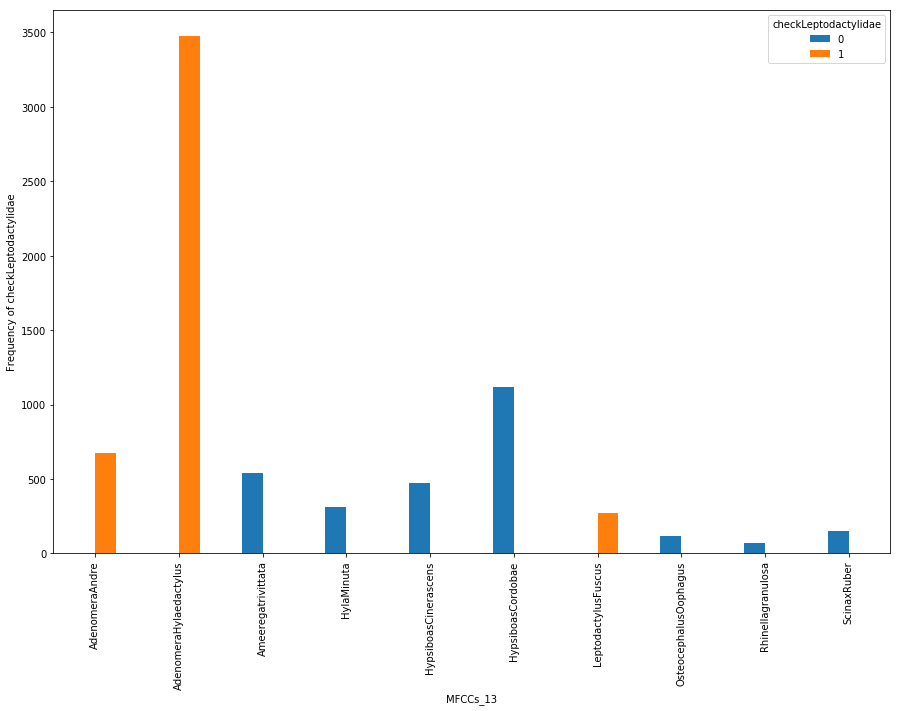

In [19]:
pd.crosstab(df.Species,df.checkLeptodactylidae).plot(kind='bar')
plt.xlabel('MFCCs_13')
plt.ylabel('Frequency of checkLeptodactylidae')

VIF factor to check logistic relations  

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Split dependent and Independent variables
y=df['checkLeptodactylidae']
X = df[['MFCCs_ 2','MFCCs_ 5','MFCCs_ 8','MFCCs_ 7','MFCCs_ 6','MFCCs_18']]
X["Const"] = 1
VIF = pd.DataFrame()
VIF["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
VIF["features"] = X.columns

print(VIF)

   VIF Factor  features
0    1.336571  MFCCs_ 2
1    2.340969  MFCCs_ 5
2    1.769179  MFCCs_ 8
3    2.262199  MFCCs_ 7
4    1.936563  MFCCs_ 6
5    1.100522  MFCCs_18
6    7.094864     Const


/Users/prathmesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


logistic regression to show the dependent variable and the most realted variable

/Users/prathmesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


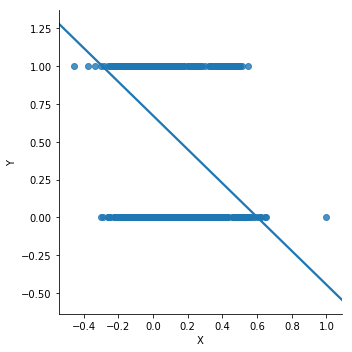

Accuracy of logistic regression classifier on test set: 0.77


In [21]:
mj = df[['MFCCs_ 2','MFCCs_ 5','MFCCs_ 8','MFCCs_ 7','MFCCs_ 6','MFCCs_18']]
y = df[['checkLeptodactylidae']]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(mj, y, test_size=0.3)


logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
t_data=pd.DataFrame()
t_data['X'] = X_test['MFCCs_ 7']
t_data['Y'] = y_pred
sns.lmplot(x='X', y='Y', data=t_data, ci=None)
plt.show()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

K CROSS FOLD VALIDATION

The k fold cross validation reduced did not do well because it reduced the accuracy of the regression also it does not satisfy all 
the assumptions of logistic regression

TRAIN: [3598 3599 3600 ..., 7192 7193 7194] TEST: [   0    1    2 ..., 3595 3596 3597]
TRAIN: [   0    1    2 ..., 3595 3596 3597] TEST: [3598 3599 3600 ..., 7192 7193 7194]
[1 1 1 1 1]


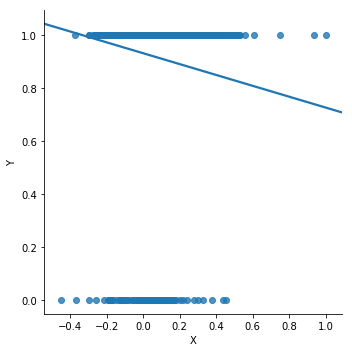

0.448429246594


In [22]:
mj = df[['MFCCs_ 2','MFCCs_ 5','MFCCs_ 8','MFCCs_ 7','MFCCs_ 6','MFCCs_18']]

y = df['checkLeptodactylidae']

kfk = kf(n_splits=2)
kfk.get_n_splits(mj)

for train_index, test_index in kfk.split(mj):
    print("TRAIN:",train_index,"TEST:",test_index)
    X_train, X_test = mj.iloc[train_index], mj.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
     
logreg = LogisticRegression()
m = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(y_pred[0:5])

t_data=pd.DataFrame()
t_data['X'] = X_test['MFCCs_ 7']
t_data['Y'] = y_pred
sns.lmplot(x='X', y='Y', data=t_data, ci=None)
plt.show()
print(m.score(X_test,y_test))

In [23]:
mj

MFCCs_ 2  MFCCs_ 5  MFCCs_ 8  MFCCs_ 7  MFCCs_ 6  MFCCs_18
0     0.152936  0.317201 -0.150063  0.100945  0.260764 -0.077623
1     0.171534  0.338672 -0.222475  0.060835  0.268353 -0.056510
2     0.152317  0.276014 -0.242234  0.008714  0.189867 -0.023590
3     0.224392  0.372088 -0.194347  0.015501  0.361005 -0.177037
4     0.087817  0.330923 -0.265423  0.006884  0.249144 -0.053074
5     0.099704  0.344535 -0.213767  0.022407  0.247569 -0.130089
6     0.021676  0.380439 -0.252300 -0.041667  0.179043 -0.055146
7     0.145130  0.279537 -0.183329  0.005791  0.175211 -0.048219
8     0.271326  0.385432 -0.173730  0.098192  0.272457 -0.112607
9     0.120565  0.364437 -0.294179  0.025992  0.307757 -0.052568
10    0.148539  0.260881 -0.216262  0.134134  0.312603 -0.120716
11    0.277948  0.307372 -0.191860  0.065702  0.257359 -0.110900
12    0.106109  0.297543 -0.288733  0.016446  0.244335 -0.071182
13    0.126523  0.381446 -0.294064 -0.017049  0.261154 -0.060630
14    0.267687  0.511468 -0.202826  0.067992  0.317788 -0.139922
15    0.137623  0.344695 -0.314418  0.056517  0.285642 -0.072913
16    0.263944  0.356645 -0.155007  0.063921  0.252806 -0.083995
17    0.146299  0.367094 -0.242952  0.054049  0.268947 -0.038580
18    0.179298  0.383029 -0.207998  0.099083  0.275313 -0.105833
19    0.273218  0.159811  0.016878  0.368838  0.416406 -0.154244
20    0.196429  0.293484 -0.169936  0.044063  0.185684 -0.067118
21    0.230999  0.403423 -0.192200  0.060464  0.276571 -0.170739
22    0.145109  0.291044 -0.172111  0.048627  0.206862 -0.067219
23    0.235682  0.355932 -0.193793  0.081008  0.290697 -0.098565
24    0.146944  0.313435 -0.216492  0.015352  0.197599 -0.052536
25    0.233512  0.316899 -0.172653  0.044433  0.220584 -0.070941
26    0.172672  0.303533 -0.197260  0.017798  0.203767 -0.023172
27    0.198494  0.425219 -0.146034  0.049410  0.257916 -0.164822
28    0.165998  0.295084 -0.180608  0.085586  0.224001 -0.084953
29    0.155225  0.284514 -0.183926  0.038581  0.219596 -0.018316
...        ...       ...       ...       ...       ...       ...
7165  0.132365 -0.042392  0.112706  0.080317  0.024487 -0.070338
7166  0.165383  0.015300  0.120438  0.025284  0.019000 -0.002231
7167  0.411916  0.333873  0.276750 -0.230982  0.094867  0.031286
7168  0.404936 -0.169260  0.078670  0.050805  0.112154  0.126233
7169  0.209224 -0.108078  0.035056  0.100347  0.174846 -0.039468
7170  0.242842 -0.040676  0.125361  0.055201  0.052257 -0.013307
7171  0.153789 -0.043499  0.113272  0.081305  0.034436 -0.028727
7172  0.266711 -0.075867  0.119675  0.080212  0.140193 -0.007999
7173  0.183156 -0.048503  0.109081  0.093071  0.041090 -0.034239
7174  0.197679 -0.056261  0.094837  0.061367  0.062528 -0.041396
7175 -0.673025  0.086890 -0.197498  0.088019  0.469024  0.114138
7176 -0.574239  0.078566 -0.146350  0.093501  0.402132  0.038051
7177 -0.515567  0.106919 -0.136494  0.121196  0.471155  0.109761
7178 -0.614409  0.062119 -0.155093  0.096506  0.501500  0.072420
7179 -0.578837  0.089931 -0.133406  0.079131  0.456617  0.125759
7180 -0.528595  0.086537 -0.155217  0.069610  0.408476  0.085869
7181 -0.442139  0.056017 -0.140148  0.073288  0.424856  0.068279
7182 -0.616029  0.095671 -0.145534  0.069414  0.439930  0.037285
7183 -0.547168  0.048947 -0.184252  0.081924  0.423631  0.115522
7184 -0.520958 -0.025129 -0.062297  0.180033  0.447967  0.019266
7185 -0.512794  0.030140 -0.189292 -0.117154  0.369783  0.255261
7186 -0.591520  0.116960 -0.158389  0.059268  0.444706  0.117996
7187 -0.507564 -0.079888 -0.069555  0.125143  0.484274  0.111998
7188 -0.512599  0.169600 -0.298284 -0.123749  0.421567  0.157321
7189 -0.558546  0.123090 -0.152216  0.066522  0.395953  0.040540
7190 -0.554504  0.034511 -0.100753  0.093889  0.443451  0.071001
7191 -0.517273  0.068097 -0.116460  0.096628  0.402890  0.068978
7192 -0.582557  0.064179 -0.103317  0.114905  0.385596  0.077771
7193 -0.519497  0.072865 -0.115799  0.086866  0.377131  0.069073
7194 -0.508833  0.078211 -0.117672  0.094

In [24]:
mj.describe()

MFCCs_ 2     MFCCs_ 5     MFCCs_ 8     MFCCs_ 7     MFCCs_ 6  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.323584     0.127046    -0.000370    -0.001397     0.097939   
std       0.218653     0.162722     0.116302     0.171404     0.120412   
min      -0.673025    -0.636012    -0.576506    -0.538982    -0.410417   
25%       0.165945     0.051717    -0.063109    -0.125737     0.012581   
50%       0.302184     0.161361     0.013265    -0.052630     0.072079   
75%       0.466566     0.222592     0.075108     0.085580     0.175957   
max       1.000000     0.752246     0.551762     1.000000     0.964240   

          MFCCs_18  
count  7195.000000  
mean      0.007755  
std       0.084733  
min      -0.759322  
25%      -0.042122  
50%       0.011820  
75%       0.061889  
max       0.614064

to check the log odd values to prove the assumptions

In [25]:
np.exp(logreg.coef_)

array([[  1.16417904e+00,   7.25506630e-04,   5.77839636e+00,
          2.86177930e-03,   3.66813259e-03,   2.78459620e-03]])

plotting the ROC curve to prove the logistic relation between
the independent and dependent variables
the farther teh curve is from the red line the better the logistic relation is

[[ 252 1981]
 [   3 1361]]


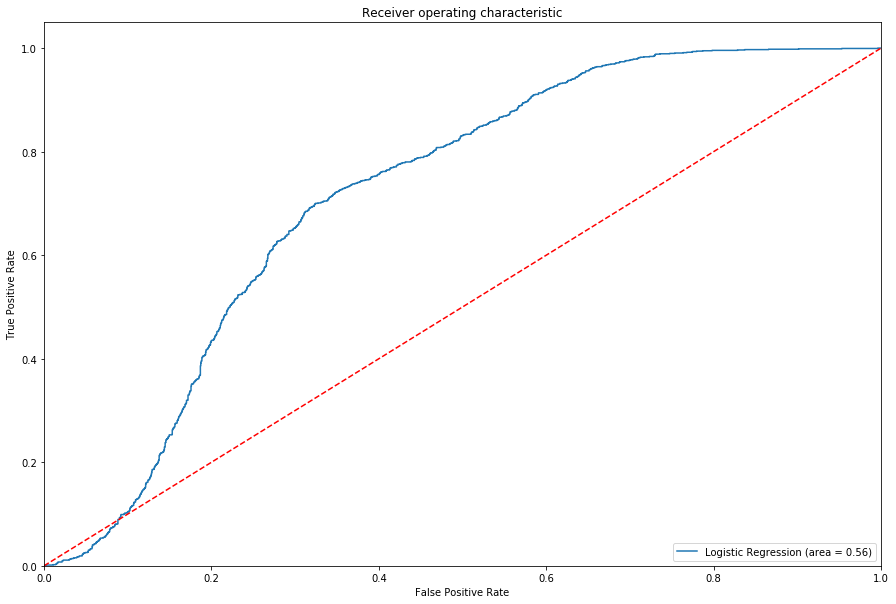

             precision    recall  f1-score   support

          0       0.99      0.11      0.20      2233
          1       0.41      1.00      0.58      1364

avg / total       0.77      0.45      0.35      3597



In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Assumptions for logistic regressions to be true and not violated

Assumptions for logistic regression:
    1) The require dependent variable is binary in nature hence the first assumption is satisfied
    2) the observations are independent of each other as calculated from the VIF factor
    3) The multi colinearity is checked by the .corr function and the vif factor using which we can decide that the columns are not highly corelated
    4) the log odd values calculated above are linear to the independent variables in the df
    5) the data set is pretty large as there are 7195 columns .. calculated above the given formula that 500(10*6/0.1) for 6 independent variables